In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir('/content/drive/My Drive/gm')

In [ ]:
cd ARU-Net

/content/drive/My Drive/gm/ARU-Net


In [ ]:
# first time only
!pip install pillow==2.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.1 MB 4.9 MB/s 
  Created wheel for pillow: filename=Pillow-2.1.0-cp37-cp37m-linux_x86_64.whl size=922297 sha256=ee260d04501d84972b5181a685d41ea1fd46a928736538160fa248cbd37ce0e1
  Stored in directory: /root/.cache/pip/wheels/67/3f/fb/fc56ebee7996d27d1e9e64680b7b49fe513dc54918df00d165
Successfully built pillow
  Attempting uninstall: pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.13.0+cu113 requires pillow!=8.3.*,>=5.3.0, but you have pillow 2.1.0 which is incompatible.
scikit-image 0.18.3 requires pillow!=7.1.0,!=7.1.1,>=4.3.0, but you have pillow 2.1.0 which is incompatible.
fastai 

In [ ]:
# one time
!pip install scipy==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 31.2 MB 1.3 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikit-image 0.18.3 requires pillow!=7.1.0,!=7.1.1,>=4.3.0, but you have pillow 2.1.0 which is incompatible.
pymc3 3.11.5 requires scipy<1.8.0,>=1.7.3, but you have scipy 1.1.0 which is incompatible.
plotnine 0.6.0 requires scipy>=1.2.0, but you have scipy 1.1.0 which is incompatible.
jaxlib 0.3.14+cuda11.cudnn805 requires scipy>=1.5, but you have scipy 1.1.0 which is incompatible.
jax 0.3.14 requires scipy>=1.5, but you have scipy 1.1.0 which is incompatible.
fastai 2.7.7 requires pillow>6.0.0, but you have pillow

In [ ]:
# one time
!pip install click==5.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 65 kB 2.7 MB/s 
  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
typer 0.4.2 requires click<9.0.0,>=7.1.1, but you have click 5.1 which is incompatible.
pip-tools 6.2.0 requires click>=7, but you have click 5.1 which is incompatible.
fastai 2.7.7 requires pillow>6.0.0, but you have pillow 2.1.0 which is incompatible.
distributed 1.25.3 requires click>=6.6, but you have click 5.1 which is incompatible.


In [ ]:
%tensorflow_version 1.x

After that, `%tensorflow_version 1.x` will throw an error.

Your notebook should be updated to use Tensorflow 2.
See the guide at https://www.tensorflow.org/guide/migrate#migrate-from-tensorflow-1x-to-tensorflow-2.

TensorFlow 1.x selected.


Start Inference
Image: ./demo_images/11.jpg 
Resolution: h 787, w 569 
Update time: 1544.39 ms
To go on just CLOSE the current plot.


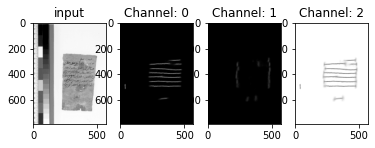

Inference avg update time: 1544.39 ms
Inference Finished!


<Figure size 432x288 with 0 Axes>

In [ ]:
%run run_demo_inference.py

## Experiment One
Experiment one involves using addWeighted function in which weight for original image was 0.8 and for binarized image, it was 0.5 to make more visible line below the text.

In [31]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow
%matplotlib inline

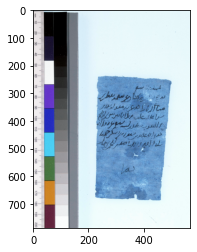

In [ ]:
img1 = cv2.imread('demo_images/11.jpg')
img1 = cv2.resize(img1, (569, 787))
plt.imshow(img1)

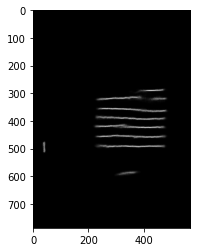

In [ ]:
img2 = cv2.imread('oout-1.jpg')
img2 = cv2.resize(img2, (569, 787))
plt.imshow(img2)

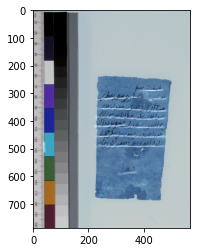

In [ ]:
dst = cv2.addWeighted(img1,0.8,img2,0.5,0)
#cv2.imwrite('result11.jpg', dst)
plt.imshow(dst)

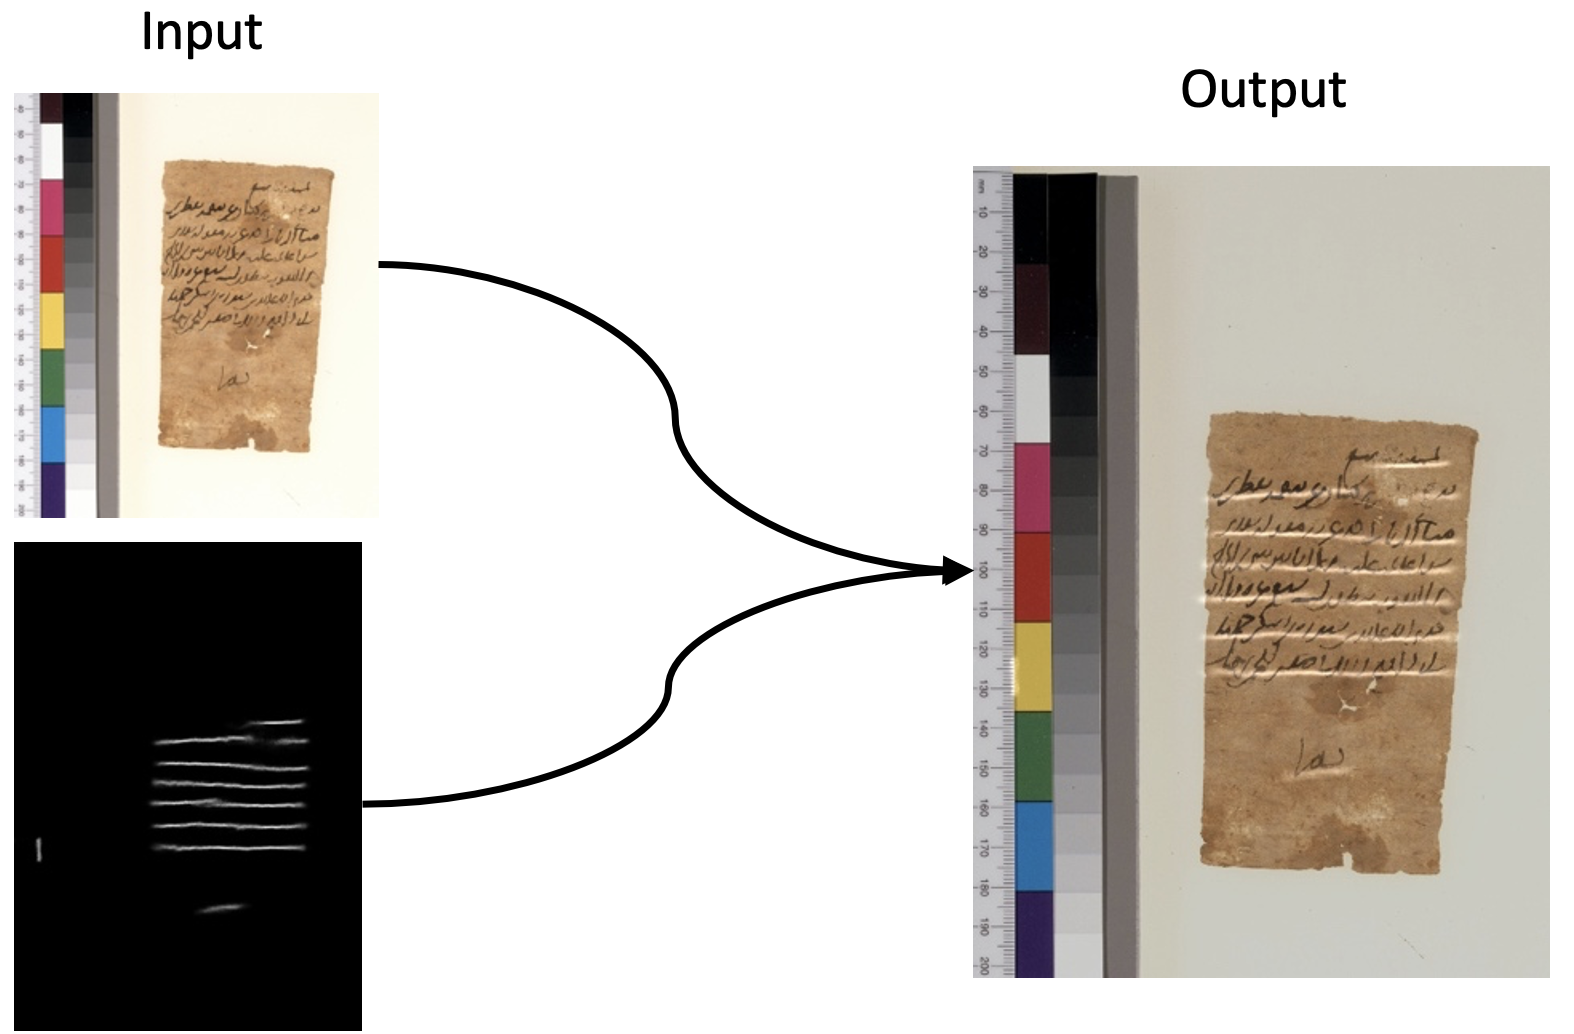

In [40]:
from IPython.display import Image
Image('exp01.png', width=800, height=500)

## Experiment Two
Experiment one involves selecting pixels with white color from predicted image are highlighted with red color on original image.

In [ ]:
# resize image 
w,h,c = img2.shape
dim = (h, w)
resized_img1 = cv2.resize(img1, dim, interpolation = cv2.INTER_AREA)

In [ ]:
x , y , c = resized_img1.shape
for i in range(x):
  for j in range(y):
    temp = img2[i][j]
    if temp[0]>0 and temp[1]>0:
      if temp[2]>0:
        resized_img1[i][j] = [0 ,0 ,255]

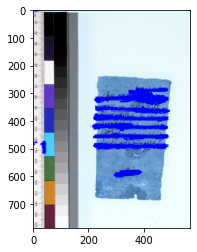

In [ ]:
plt.imshow(resized_img1)

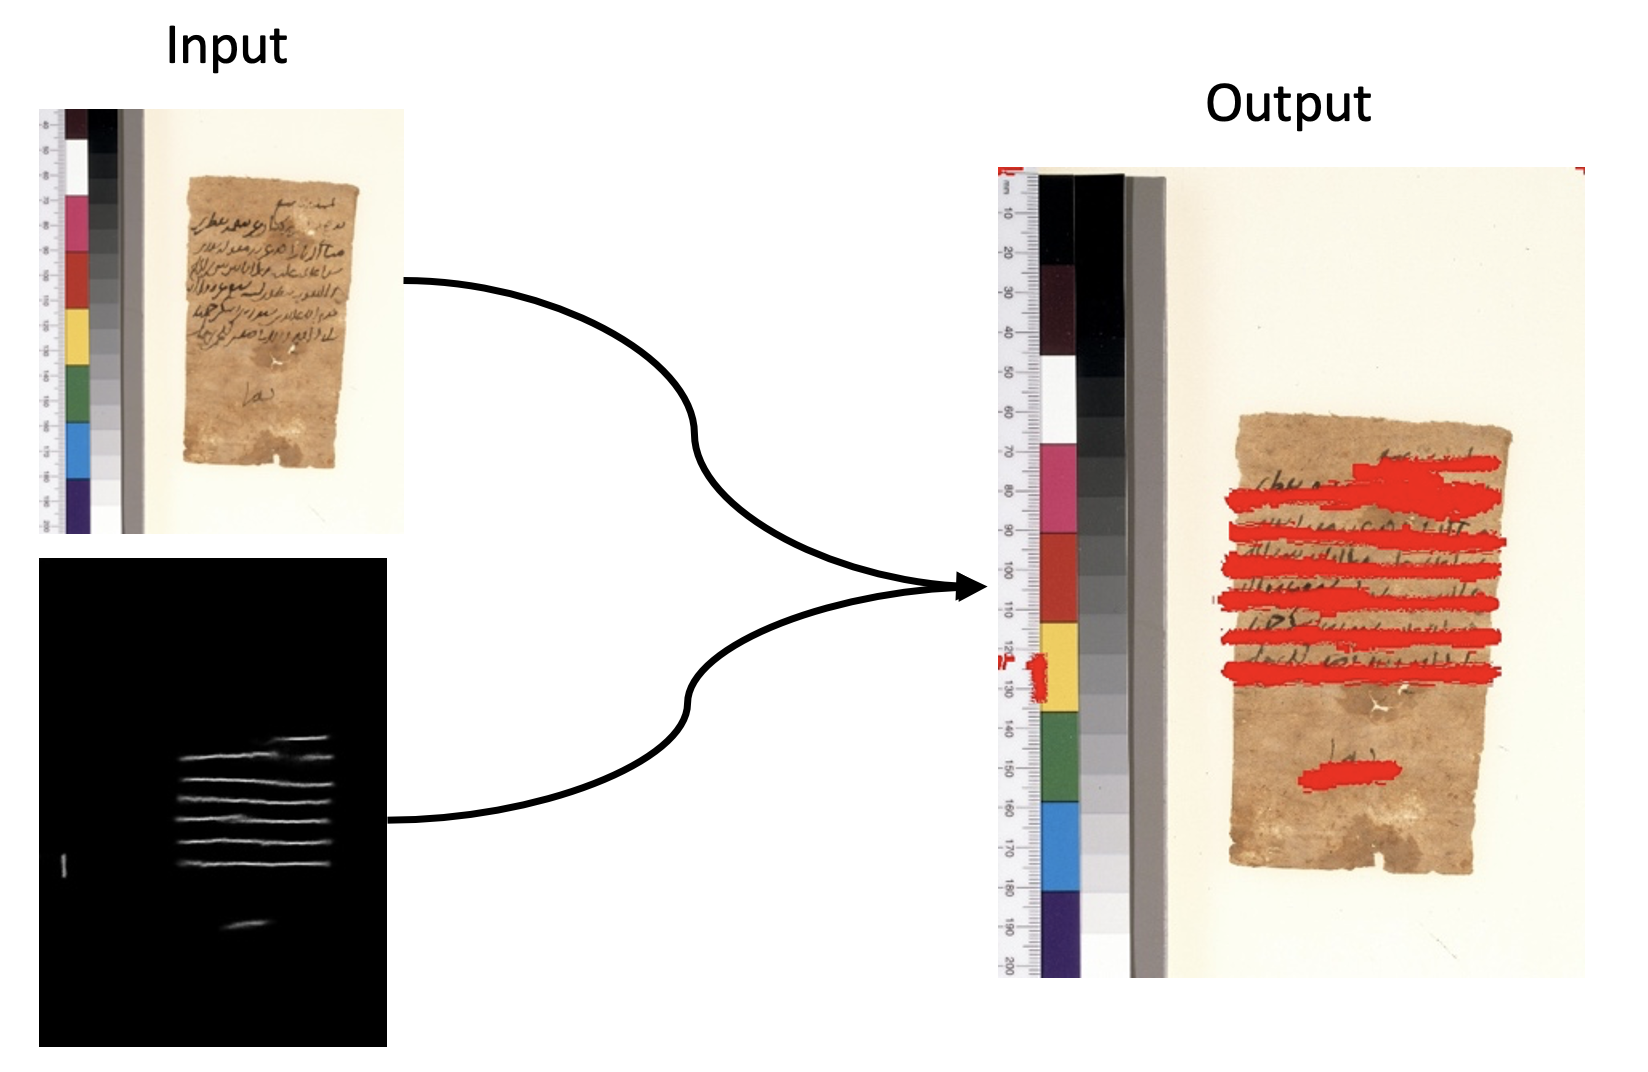

In [41]:
from IPython.display import Image
Image('exp02.png', width=800, height=500)

## Challenges
**Challenge 01: Most of these historical documents are dark and contains text whose pixel values are matching with paper pixels values so to separate both, it is much difficult.**
> **Solution**: Need to perform background subtraction based on text and different operations will be involved, depending on different types of text

**Challenge 02: Some images were different, so ARU-Net model didn't detect even single line as shown in following example.**
> **Solution**: Need to train model on these types of images, for training, again we need dataset. To the best of my knowledge, this type of dataset is not available publicly.
